In [6]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
file1 = pd.read_csv("pagecounts-20190509-120000.txt", sep=' ', header = None, index_col=1, names=['lang', 'page', 'views', 'bytes'])
file1_view = file1.sort_values('views', ascending=False)['views']

file2 = pd.read_csv("pagecounts-20190509-130000.txt", sep=' ', header = None, index_col=1, names=['lang', 'page', 'views', 'bytes'])
file2_view = file2.sort_values('views', ascending=False)['views']

#Both dataframe have 'view', so we need to distinguish them. 
file1_view.name = "view1"
file2_view.name = "view2"

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
f1_f2 = pd.concat([file1_view, file2_view], axis=1).reset_index()



                                              index  view1  view2
0                       Java_(programming_language)    128  151.0
1                     Universally_unique_identifier    108  134.0
2                                     Alex_Ferguson     72   74.0
3                                 Citric_acid_cycle     58   69.0
4                                           Senegal     53   52.0
...                                             ...    ...    ...
2495                                     Paul_Flato      1    NaN
2496  List_of_French_Open_women's_singles_champions      1    2.0
2497                                         Yacuma      1    NaN
2498                                     Steradians      1    4.0
2499                    Saints_Row:_Gat_Out_of_Hell      1    1.0

[2500 rows x 3 columns]


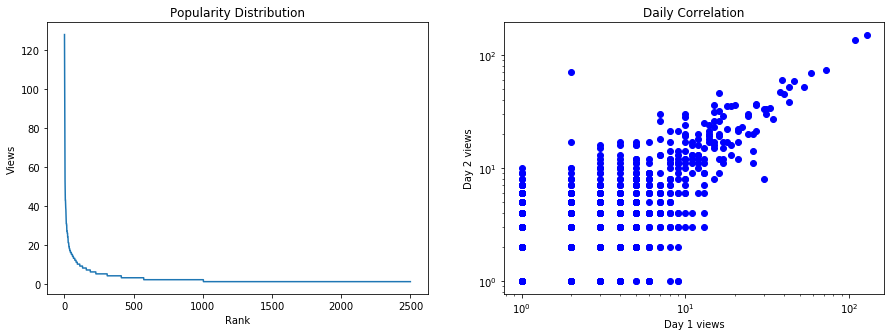

In [9]:
print(f1_f2)
#print(file1_view)
#print(file2_view)
plt.figure(figsize=(15, 5)) #change the size to something sensible
plt.subplot(1,2, 1) #subplots in 1 row, 2 columns, select the first
plt.plot(file1_view.values)
plt.title('Popularity Distribution')
plt.xlabel("Rank")
plt.ylabel("Views")

plt.subplot(1,2,2)
plt.scatter(f1_f2['view1'], f1_f2['view2'], color='b')
#https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xscale
plt.xscale('log')
plt.yscale('log')
plt.title('Daily Correlation')
plt.xlabel("Day 1 views")
plt.ylabel("Day 2 views")

plt.savefig('wikipedia.png')